4.1.2
world_points: 
 [[0. 2. 0.]
 [2. 2. 0.]
 [2. 0. 0.]
 [0. 0. 0.]]
image_points: 
 [[196. 446.]
 [203. 337.]
 [357. 333.]
 [367. 436.]]
rotation: 
 [[ 1.49083208]
 [-1.62003854]
 [ 1.06171978]]
translation: 
 [[0.45187791]
 [2.17754159]
 [5.55013011]]


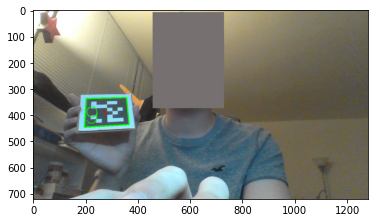

In [ ]:
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow

demo_img = cv2.imread('Tag_AR.JPG')

# show the apriltag use matplotlib. If you use your local environment, you can use cv2.imshow() function as you did before
from matplotlib.pyplot import imshow
imshow(demo_img[:,:,::-1])

# Check the version of OpenCV-Python
print( cv2.__version__ )

demo_img = cv2.imread('aruco_process.JPG')
imshow(demo_img[:,:,::-1])

apriltag_img = cv2.imread('img_2.jpg')

# show the apriltag use matplotlib. If you use your local environment, you can use cv2.imshow() function as you did before
imshow(apriltag_img[:,:,::-1])

# load Tag36h11 in aruco dictionary
ARUCO_DICT = {"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11}
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT["DICT_APRILTAG_36h11"])

import numpy as np
arucoParams = cv2.aruco.DetectorParameters_create()
(image_points, ids, rejected) = cv2.aruco.detectMarkers(apriltag_img, arucoDict,
	parameters=arucoParams)

# by default, the four corners are (x,y) coordinates in the image, with pixel as unit. 
# The order of the four corners are top-left, top-right, bottom-right, and bottom-left

# Ensure that at least one tag is detected, then prepare the corners for drawing:
if len(image_points) > 0:
	# flatten the ArUco IDs list
	ids = ids.flatten()
	# loop over the detected ArUCo corners
	for (markerCorner, markerID) in zip(image_points, ids):
		# extract the marker corners
		image_points = markerCorner.reshape((4, 2))
		(topLeft, topRight, bottomRight, bottomLeft) = image_points
		# convert each of the (x, y)-coordinate pairs to integers
		topRight = (int(topRight[0]), int(topRight[1]))
		bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
		bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
		topLeft = (int(topLeft[0]), int(topLeft[1]))
  
  # draw the bounding box of the ArUCo detection
cv2.line(apriltag_img, topLeft, topRight, (0, 255, 0), 4)
cv2.line(apriltag_img, topRight, bottomRight, (0, 255, 0), 4)
cv2.line(apriltag_img, bottomRight, bottomLeft, (0, 255, 0), 4)
cv2.line(apriltag_img, bottomLeft, topLeft, (0, 255, 0), 4)

# compute and draw the center (x, y)-coordinates of the ArUco marker
cX = int((topLeft[0] + bottomRight[0]) / 2.0)
cY = int((topLeft[1] + bottomRight[1]) / 2.0)
cv2.circle(apriltag_img, (cX, cY), 4, (0, 0, 255), -1)
# draw the ArUco marker ID on the image
cv2.putText(apriltag_img, str(markerID),
  (topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
  3, (0, 255, 0), 2)
imshow(apriltag_img[:,:,::-1])

import numpy as np
world_points = np.array([[0., 2., 0.], [2., 2., 0.], [2., 0., 0.], [0., 0., 0.]]) # ensure here we use float64 type, instead of int.
K = np.array([[488.28641007, 0.0, 332.06957035],
              [0.0, 488.77480869, 245.31567295],
              [0.0, 0.0, 1.0]])
distorC = np.array([-0.008407,
                       0.00973303,
                       -0.0014482,
                       0.00064034,
                       0.0])
print("world_points: \n", world_points)
print("image_points: \n", image_points)
_, rot, trans = cv2.solvePnP(world_points, image_points, K, distorC)
print("rotation: \n", rot)
print("translation: \n", trans)

draw_points_3d = [np.array([0., 1., 2.]), np.array([1., 1., 2.]), np.array([1., 0., 2.]), np.array([0., 0., 2.])]
draw_points_2d = []                                                                          
for i in range(len(draw_points_3d)):
  tmp = cv2.projectPoints(draw_points_3d[i], rot, trans, K, distorC)[0][0][0]  
  draw_points_2d.append(tmp)                         

# use the draw line function that you learned from previous lecture
#print(draw_points_2d)
#print(image_points)
#line1 = cv2.line(apriltag_img, (int(draw_points_2d[0][0]), int(draw_points_2d[0][1])), (int(draw_points_2d[1][0]), int(draw_points_2d[1][1])), (0,255,0),5)
#line2 = cv2.line(apriltag_img, (int(draw_points_2d[1][0]), int(draw_points_2d[1][1])), (int(draw_points_2d[2][0]), int(draw_points_2d[2][1])), (0,255,0),5)
#line3 = cv2.line(apriltag_img, (int(draw_points_2d[2][0]), int(draw_points_2d[2][1])), (int(draw_points_2d[3][0]), int(draw_points_2d[3][1])), (0,255,0),5)
#line4 = cv2.line(apriltag_img, (int(draw_points_2d[3][0]), int(draw_points_2d[3][1])), (int(draw_points_2d[0][0]), int(draw_points_2d[0][1])), (0,255,0),5)

#line5 = cv2.line(apriltag_img, (int(draw_points_2d[0][0]), int(draw_points_2d[0][1])), (int(image_points[0][0]), int(image_points[0][1])), (0,255,0),5)
#line6 = cv2.line(apriltag_img, (int(draw_points_2d[1][0]), int(draw_points_2d[1][1])), (int(image_points[1][0]), int(image_points[1][1])), (0,255,0),5)
#line7 = cv2.line(apriltag_img, (int(draw_points_2d[2][0]), int(draw_points_2d[2][1])), (int(image_points[2][0]), int(image_points[2][1])), (0,255,0),5)
#line8 = cv2.line(apriltag_img, (int(draw_points_2d[3][0]), int(draw_points_2d[3][1])), (int(image_points[3][0]), int(image_points[3][1])), (0,255,0),5)


#imshow(apriltag_img[:,:,::-1])
